In [96]:
import pickle 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

skema1 = pickle.load(open("skema1.sav", "rb"))
skema1 = skema1["model1"]

skema2 = pickle.load(open("skema2.sav", "rb"))
skema2 = skema2["model2"]

skema3 = pickle.load(open("skema3.sav", "rb"))
skema3 = skema3["model3"]

In [97]:
best_model_accuracy1 = skema1['accuracy']
best_model_accuracy2 = skema2['accuracy']
best_model_accuracy3 = skema3['accuracy']

In [98]:
# Create a DataFrame with the required structure
data = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Skema 1': [skema1['accuracy'], skema1['precision'], skema1['recall'], skema1['f1_score']],
    'Skema 2': [skema2['accuracy'], skema2['precision'], skema2['recall'], skema2['f1_score']],
    'Skema 3': [skema3['accuracy'], skema3['precision'], skema3['recall'], skema3['f1_score']]
}

comparison_df = pd.DataFrame(data)

# Convert metrics to categorical for correct ordering
comparison_df['Metrics'] = pd.Categorical(comparison_df['Metrics'], categories=['Accuracy', 'Precision', 'Recall', 'F1 Score'], ordered=True)
comparison_df = comparison_df.sort_values('Metrics')
print(comparison_df)

     Metrics   Skema 1   Skema 2   Skema 3
0   Accuracy  0.702744  0.691760  0.688024
1  Precision  0.687023  0.723404  0.647887
2     Recall  0.368852  0.278689  0.373225
3   F1 Score  0.480000  0.402367  0.473616


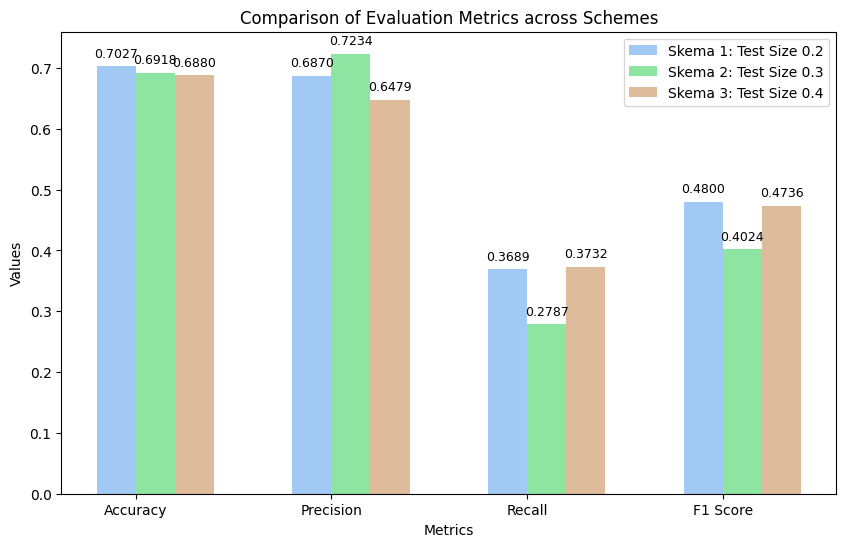

In [99]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# Define pastel colors
colors = sns.color_palette("pastel")

bar_width = 0.2
bar_positions_skema1 = np.arange(len(comparison_df['Metrics']))
bar_positions_skema2 = bar_positions_skema1 + bar_width
bar_positions_skema3 = bar_positions_skema1 + 2 * bar_width

ax.bar(bar_positions_skema1, comparison_df['Skema 1'], width=bar_width, label='Skema 1: Test Size 0.2', color=colors[0])
ax.bar(bar_positions_skema2, comparison_df['Skema 2'], width=bar_width, label='Skema 2: Test Size 0.3', color=colors[2])
ax.bar(bar_positions_skema3, comparison_df['Skema 3'], width=bar_width, label='Skema 3: Test Size 0.4', color=colors[5])

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Evaluation Metrics across Schemes')
ax.set_xticks(bar_positions_skema1 + bar_width / 2)
ax.set_xticklabels(comparison_df['Metrics'])

# Adding legend
ax.legend()

# Adding numeric values on top of each bar
for i, value in enumerate(comparison_df['Skema 1']):
    ax.text(bar_positions_skema1[i], value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

for i, value in enumerate(comparison_df['Skema 2']):
    ax.text(bar_positions_skema2[i], value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

for i, value in enumerate(comparison_df['Skema 3']):
    ax.text(bar_positions_skema3[i], value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

# Display the plot
plt.show()


C:\Users\Airlangga\AppData\Local\Temp\ipykernel_31228\833629036.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracy_scores, palette='pastel')


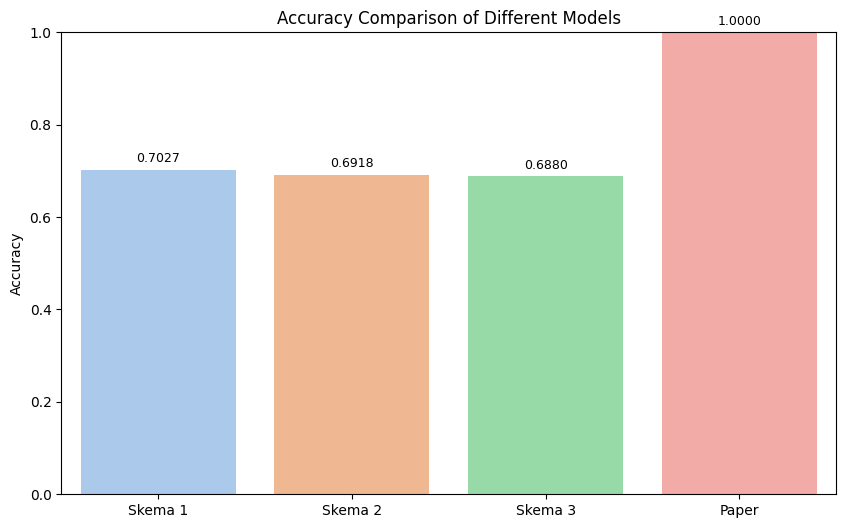

In [100]:
# Assigning accuracy values
skema1_accuracy = skema1['accuracy']
skema2_accuracy = skema2['accuracy']
skema3_accuracy = skema3['accuracy']
paper_accuracy = 1

# Data preparation
models = ['Skema 1', 'Skema 2', 'Skema 3', 'Paper']
accuracy_scores = [skema1_accuracy, skema2_accuracy, skema3_accuracy, paper_accuracy]

# Plotting the histogram
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=models, y=accuracy_scores, palette='pastel')

# Adding numeric values on top of each bar
for i, value in enumerate(accuracy_scores):
    ax.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()
